In [4]:
ont_res = {1:[5646,34.200], 2:[5730,34.077], 5:[6204,34.141], 10:[5733,34.184], 15:[5353,34.213], 20:[5507,34.242], 25:[5981,35.117], 30:[5536,35.089], 50:[5896,35.075], 70:[6780,34.104], 112:[7909,33.403]}
hifi_res = {1:[4896,34.938], 2:[5181,34.125], 5:[4773,34.077], 10:[4922,34.967], 15:[5020,34.940], 20:[5130,34.029], 25:[5449,33.999], 33:[6050,34.835]}

ont_res = {k: [ont_res[k][0]/60, ont_res[k][1]] for k in ont_res}
hifi_res = {k: [hifi_res[k][0]/60, hifi_res[k][1]] for k in hifi_res}

print(min(ont_res.values(),key=lambda x:x[1]),max(ont_res.values(),key=lambda x:x[1]))
print(min(hifi_res.values(),key=lambda x:x[1]),max(hifi_res.values(),key=lambda x:x[1]))

[131.81666666666666, 33.403] [99.68333333333334, 35.117]
[90.81666666666666, 33.999] [82.03333333333333, 34.967]


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Get all unique keys and sort them
all_keys = sorted(set(list(ont_res.keys()) + list(hifi_res.keys())))
min_key, max_key = min(all_keys), max(all_keys)

# Create color gradient based on key values
cmap = plt.cm.viridis  # You can change this to any colormap: plasma, cool, hot, etc.
norm = plt.Normalize(min_key, max_key)

# Plot dictionary 1 with triangles
ont_res_sorted_keys = sorted(ont_res.keys())
ont_res_x = [ont_res[key][0] for key in ont_res_sorted_keys]
ont_res_y = [ont_res[key][1] for key in ont_res_sorted_keys]

# Connect points in dictionary 1
plt.plot(ont_res_x, ont_res_y, color='gray', linestyle='-', alpha=0.3, linewidth=2, label='Set 1 trend')

for key in ont_res_sorted_keys:
    color = cmap(norm(key))
    plt.scatter(ont_res[key][0], ont_res[key][1], color=color,
                marker='^', s=100, alpha=0.8, edgecolors='white', linewidth=1)

# Plot dictionary 2 with circles
hifi_res_sorted_keys = sorted(hifi_res.keys())
hifi_res_x = [hifi_res[key][0] for key in hifi_res_sorted_keys]
hifi_res_y = [hifi_res[key][1] for key in hifi_res_sorted_keys]

# Connect points in dictionary 2
plt.plot(hifi_res_x, hifi_res_y, color='gray', linestyle='-', alpha=0.3, linewidth=2, label='Set 2 trend')

for key in hifi_res_sorted_keys:
    color = cmap(norm(key))
    plt.scatter(hifi_res[key][0], hifi_res[key][1], color=color,
                marker='o', s=100, alpha=0.8, edgecolors='white', linewidth=1)

# Add connecting lines between datasets for common keys
common_keys = sorted(set(ont_res.keys()) & set(hifi_res.keys()))
for key in common_keys:
    x1, y1 = ont_res[key]
    x2, y2 = hifi_res[key]
    color = cmap(norm(key))

plt.xlabel('Time (in seconds)')
plt.ylabel('Memmory (in Mb)')
plt.title('Resource usage per average coverage')

# Create colorbar to show the key gradient
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label='Coverage')
cbar.set_label('Coverage', rotation=270, labelpad=15)

# Create legend for markers
legend_elements = [
    plt.Line2D([0], [0], marker='^', color='k', markersize=10,
              label='ONT', linestyle='None'),
    plt.Line2D([0], [0], marker='o', color='k', markersize=10,
              label='HiFi', linestyle='None')
]

plt.legend(handles=legend_elements, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Get all unique keys and sort them
all_keys = sorted(set(list(ont_res.keys()) + list(hifi_res.keys())))
min_key, max_key = min(all_keys), max(all_keys)

# Create color gradient based on key values
cmap = plt.cm.turbo  # You can change this to any colormap: plasma, cool, hot, etc.
norm = plt.Normalize(min_key, max_key)

# Plot dictionary 1 with triangles
ont_res_sorted_keys = sorted(ont_res.keys())
ont_res_x = [ont_res[key][0] for key in ont_res_sorted_keys]
ont_res_y = [ont_res[key][1] for key in ont_res_sorted_keys]

# Connect points in dictionary 1
plt.plot(ont_res_x, ont_res_y, color='gray', linestyle='-', alpha=0.3, linewidth=2, label='Set 1 trend')

for key in ont_res_sorted_keys:
    color = cmap(norm(key))
    plt.scatter(ont_res[key][0], ont_res[key][1], color=color,
                marker='^', s=100, alpha=0.8, edgecolors='white', linewidth=1)

# Plot dictionary 2 with circles
hifi_res_sorted_keys = sorted(hifi_res.keys())
hifi_res_x = [hifi_res[key][0] for key in hifi_res_sorted_keys]
hifi_res_y = [hifi_res[key][1] for key in hifi_res_sorted_keys]

# Connect points in dictionary 2
plt.plot(hifi_res_x, hifi_res_y, color='gray', linestyle='-', alpha=0.3, linewidth=2, label='Set 2 trend')

for key in hifi_res_sorted_keys:
    color = cmap(norm(key))
    plt.scatter(hifi_res[key][0], hifi_res[key][1], color=color,
                marker='o', s=100, alpha=0.8, edgecolors='white', linewidth=1)

# Add connecting lines between datasets for common keys
common_keys = sorted(set(ont_res.keys()) & set(hifi_res.keys()))
for key in common_keys:
    x1, y1 = ont_res[key]
    x2, y2 = hifi_res[key]
    color = cmap(norm(key))

plt.xlabel('Time (in seconds)')
plt.ylabel('Memmory (in Mb)')
plt.title('Resource usage per average coverage')

# Create dot legend for key values
legend_elements = []

key_subset = all_keys  # Show all keys, or use subset for clarity
# key_subset = [min_key, (min_key + max_key) // 2, max_key]  # For fewer entries

for key in key_subset:
    color = cmap(norm(key))
    legend_elements.append(
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                  markersize=8, label=f'{key}x', linestyle='None')
    )

# Add dataset markers to legend
legend_elements.append(
    plt.Line2D([0], [0], marker='^', color='k', markersize=10,
              label='ONT', linestyle='None')
)
legend_elements.append(
    plt.Line2D([0], [0], marker='o', color='k', markersize=10,
              label='HiFi', linestyle='None')
)

plt.legend(handles=legend_elements, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

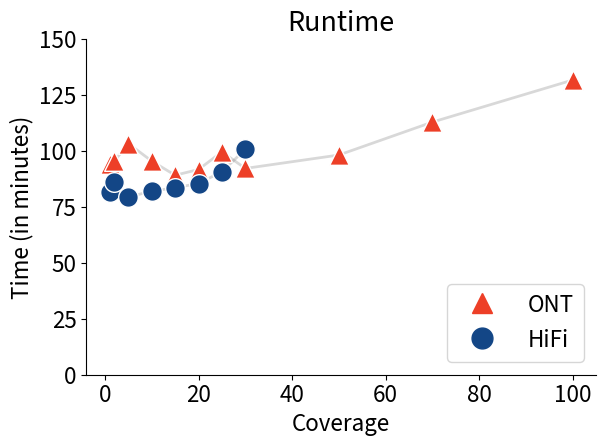

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from pyfonts import load_google_font

font_path = load_google_font("Source Sans 3")

plt.close()
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 18})
mpl.rcParams['font.family'] = 'Source Sans 3'

# If font_path is a FontProperties object, get the actual path
if hasattr(font_path, 'get_file'):
    mpl.font_manager.fontManager.addfont(font_path.get_file())
else:
    mpl.font_manager.fontManager.addfont(font_path)
#plt.figure(figsize=(12, 8))

# Get all unique keys and sort them
all_keys = sorted(set(list(ont_res.keys()) + list(hifi_res.keys())))
min_key, max_key = min(all_keys), max(all_keys)

# Create color gradient based on key values
#cmap = plt.cm.turbo
#norm = plt.Normalize(min_key, max_key)

# Plot dictionary 1 with triangles
ont_res_sorted_keys = sorted(ont_res.keys())
ont_res_x = [key for key in ont_res_sorted_keys]
ont_res_y = [ont_res[key][0] for key in ont_res_sorted_keys]

# Connect points in dictionary 1
plt.plot(ont_res_x, ont_res_y, color='gray', linestyle='-', alpha=0.3, linewidth=2, zorder=0)

for key in ont_res_sorted_keys:
    #color = cmap(norm(key))
    plt.scatter(key, ont_res[key][0], color='#ED3F27',
                marker='^', s=200, alpha=1, edgecolors='white', linewidth=1)

# Plot dictionary 2 with circles
hifi_res_sorted_keys = sorted(hifi_res.keys())
hifi_res_x = [key for key in hifi_res_sorted_keys]
hifi_res_y = [hifi_res[key][0] for key in hifi_res_sorted_keys]

# Connect points in dictionary 2
plt.plot(hifi_res_x, hifi_res_y, color='gray', linestyle='-', alpha=0.3, linewidth=2, zorder=0)

for key in hifi_res_sorted_keys:
    #color = cmap(norm(key))
    plt.scatter(key, hifi_res[key][0], color='#134686',
                marker='o', s=200, alpha=1, edgecolors='white', linewidth=1)


legend_elements = []

# Add dataset markers to legend
legend_elements.append(
    plt.Line2D([0], [0], marker='^', color='#ED3F27', markersize=15,
              label='ONT', linestyle='None')
)
legend_elements.append(
    plt.Line2D([0], [0], marker='o', color='#134686', markersize=15,
              label='HiFi', linestyle='None')
)

plt.xlabel('Coverage')
plt.ylabel('Time (in minutes)')
plt.title('Runtime')
plt.ylim(0,150)
plt.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
plt.savefig("runtime_per_coverage.png")
plt.savefig("runtime_per_coverage.svg")
plt.show()

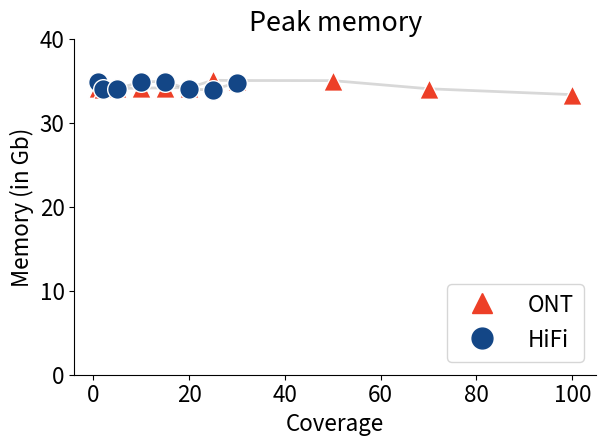

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from pyfonts import load_google_font

font_path = load_google_font("Source Sans 3")

plt.close()
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 18})
mpl.rcParams['font.family'] = 'Source Sans 3'

# If font_path is a FontProperties object, get the actual path
if hasattr(font_path, 'get_file'):
    mpl.font_manager.fontManager.addfont(font_path.get_file())
else:
    mpl.font_manager.fontManager.addfont(font_path)


# Get all unique keys and sort them
all_keys = sorted(set(list(ont_res.keys()) + list(hifi_res.keys())))
min_key, max_key = min(all_keys), max(all_keys)

# Create color gradient based on key values
# cmap = plt.cm.turbo
#norm = plt.Normalize(min_key, max_key)

# Plot dictionary 1 with triangles
ont_res_sorted_keys = sorted(ont_res.keys())
ont_res_x = [key for key in ont_res_sorted_keys]
ont_res_y = [ont_res[key][1] for key in ont_res_sorted_keys]

# Connect points in dictionary 1
plt.plot(ont_res_x, ont_res_y, color='gray', linestyle='-', alpha=0.3, linewidth=2, zorder=0)

for key in ont_res_sorted_keys:
    #color = cmap(norm(key))
    plt.scatter(key, ont_res[key][1], color='#ED3F27',
                marker='^', s=200, alpha=1, edgecolors='white', linewidth=1)

# Plot dictionary 2 with circles
hifi_res_sorted_keys = sorted(hifi_res.keys())
hifi_res_x = [key for key in hifi_res_sorted_keys]
hifi_res_y = [hifi_res[key][1] for key in hifi_res_sorted_keys]

# Connect points in dictionary 2
plt.plot(hifi_res_x, hifi_res_y, color='gray', linestyle='-', alpha=0.3, linewidth=2, zorder=0)

for key in hifi_res_sorted_keys:
    #color = cmap(norm(key))
    plt.scatter(key, hifi_res[key][1], color='#134686',
                marker='o', s=200, alpha=1, edgecolors='white', linewidth=1)


legend_elements = []

# Add dataset markers to legend
legend_elements.append(
    plt.Line2D([0], [0], marker='^', color='#ED3F27', markersize=15,
              label='ONT', linestyle='None')
)
legend_elements.append(
    plt.Line2D([0], [0], marker='o', color='#134686', markersize=15,
              label='HiFi', linestyle='None')
)

plt.xlabel('Coverage')
plt.ylabel('Memory (in Gb)')
plt.title('Peak memory')
plt.ylim(0,40)
plt.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
plt.savefig("memory_per_coverage.png")
plt.savefig("memory_per_coverage.svg")
plt.show()